# Exercício de classificação de imagens usando RNA

Esta foi mais uma das matérias vistas no curso **Data Science Degree | Empiricus** que após o curso foi revisada e com isso acabei pegando algumas dicas na internet em sites, blogs, etc.

O exercício se resume em importar um banco de dados com imagens de números escritos de 0 a 9 onde treinaremos um modelo para identificar o que cada imagem representa.

### 1º Célula

Na célula abaixo comecei importando as bibliotecas necessárias para a finalização do projeto e em seguida criei uma função que vai em sequência:

- Baixar as imagens da biblioteca keras.datasets.mnist;
- Separar as imagens em treino e teste;
- Vizualizando os dados para eventuais verificações de erros;

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000


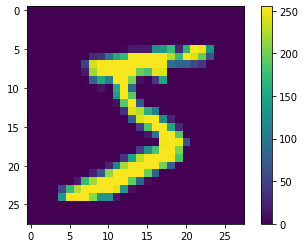

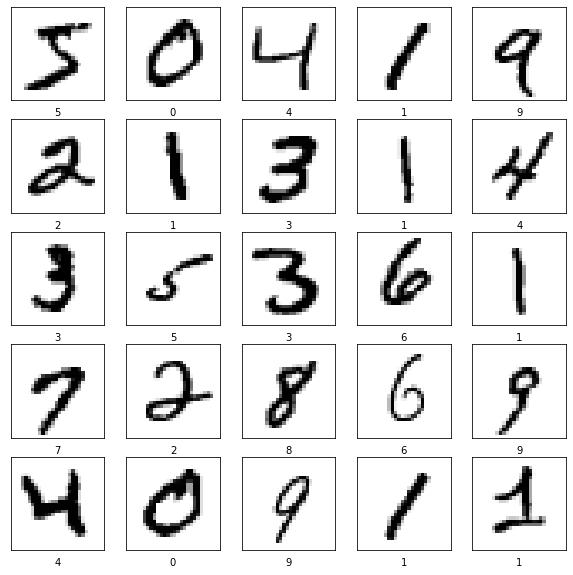

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from tensorflow import keras
import tensorflow as tf

# Função criada para ler as imagens da biblioteca e separar em treino e teste
def import_images():
    mnist = keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    return X_train, y_train, X_test, y_test # Retornando o que será treinado 
    
def Plot_images(treino, resp_treino, teste, resp_teste):
    print(treino.shape)
    print(len(resp_treino))
    print(resp_treino)
    print(teste.shape)
    print(len(resp_teste))
    
    plt.figure()
    plt.imshow(treino[0])
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(treino[i], cmap=plt.cm.binary)
        plt.xlabel(resp_treino[i])
    plt.show()
    
X_train = import_images()[0]
y_train = import_images()[1]
X_test = import_images()[2]
y_test = import_images()[3]

Plot_images(treino=X_train, resp_treino=y_train, teste=X_test, resp_teste=y_test)

### myCallback

myCallback foi uma classe criada com o intuito de para o treino do nosso modelo, quando atingir uma validação de perda que consideramos adequada para esse modelo.

Fiz uma normalização dos dados de entrada para que o modelo pudesse melhorar o seu aprendizado, e também transformei as respostas em um array para que pudesse receber as saídas corretamente.

In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.075):
            print('\nLoss is low so cancelling training!')
            self.model.stop_training = True
            
# Este print nos ajuda a enteder como que a máquina entende a imagem
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [3]:
# Como recebemos os nossos dados de saída
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
X_train = X_train / 255.0 # Normalização dos dados de entrada [0,1]
X_test = X_test / 255.0 # Normalização dos dados de entrada [0,1]    

y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Os dados de saída após a transfomação o 1 se torna a confimação de qual neurônio de saída é o número da imagem
# No segundo seria o nº 1 por exemplo
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

### Criando a rede

O nosso **input_shape** recebe uma matriz de 28x28 que é o tamanho das imagens fornecidas pela biblioteca, como vimos na célula 1 **linha 25** onde demos um **.shape** da imagem.

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Formato de entrada 28,28 pixels
    keras.layers.Dense(128, activation=tf.nn.relu), # Camada oculta
    keras.layers.Dense(128, activation=tf.nn.relu), # Camada oculta
    keras.layers.Dense(10, activation=tf.nn.softmax) # Camada de resposta
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Chamando a classe myCallback()
callbacks = myCallback()

# Treinamento
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
historico = model.fit(X_train, 
                      y_train, 
                      epochs=10, 
                      verbose=1, 
                      validation_data = (X_test, y_test), 
                      callbacks=[callbacks]) # Momento aonde passamos o stop da rede

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2281 - accuracy: 0.9337 - val_loss: 0.1138 - val_accuracy: 0.9649
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0962 - accuracy: 0.9708 - val_loss: 0.0855 - val_accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0770 - val_accuracy: 0.9751
Epoch 4/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0517 - accuracy: 0.9841
Loss is low so cancelling training!
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.0743 - val_accuracy: 0.9774


### Verificação de taxa de aprendizado

No gráfico abaixo podemos verificar como que ficou a taxa de aprendizado no modelo. Visto que temos um **Training loss**, muito próximo do **Validantion loss**, podemos chegar a conclusão de que a rede está bem treinada, pois não parece ter nenhum indício de **overfitting**.

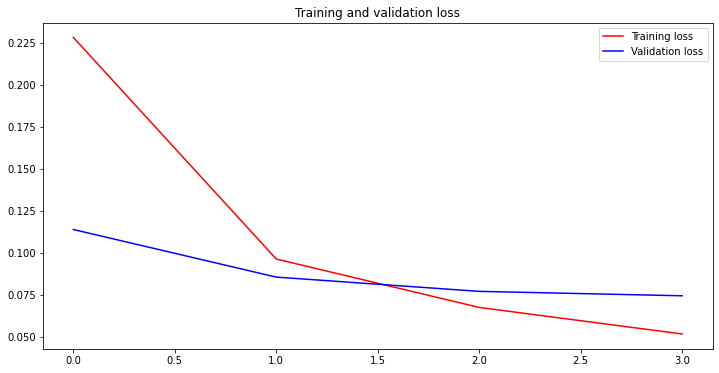

In [7]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
loss = historico.history['loss']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_loss = historico.history['val_loss']

# numero de epochs
epochs = range(len(loss))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'red', label = 'Training loss')
plt.plot(epochs, val_loss, 'blue', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Demonstração de overfitting!

Na imagem abaixo podemos ver claramente um **overfitting** acontecendo. O modelo decora toda a base de treino, mas na hora de fazer as predições em uma base de dados diferente da de treino, este infelizmente não consegue predizer.

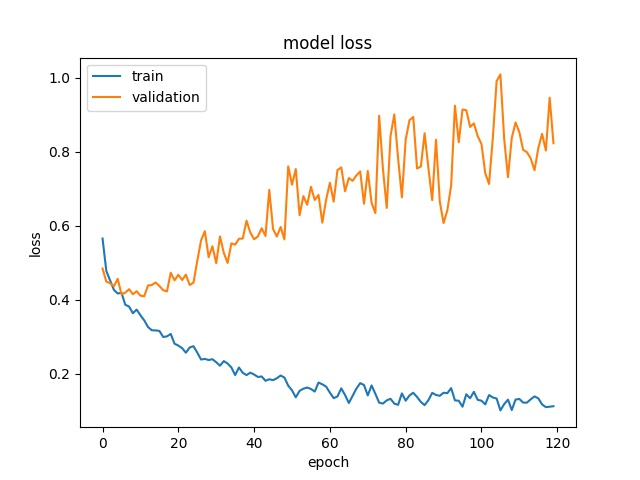

In [8]:
# Predizendo a base de teste
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

313/313 [==============================] - 0s 776us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Retransformando y_test

Na célula abaixo precisei voltar o y_test para os valores iniciais para poder plotar uma matriz de confusão.

In [9]:
# voltando o y_test pra valores numéricos
y_test = np.argmax(y_test, axis=1)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Matriz de confusão do modelo nos dados de teste:



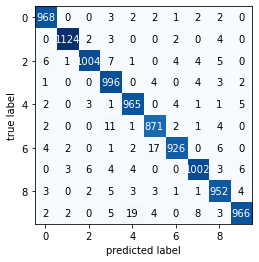

In [11]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print("Matriz de confusão do modelo nos dados de teste:\n")
plot_confusion_matrix(conf_mat=cm)
plt.show()